# Homework 3: PCA and Classification

## 1. Feature Loadings in Principal Components, Dow Dataset (10 pts)

We learned in lecture that principal components are linear combinations of the original features measured in a dataset. Thus, each of the original features is "loaded" to some degree into each principal component. This problem is an exercise in determining which of the original features are most important in specific principal components.

To complete this problem:
1. Use the code below to import the Dow chemical process dataset with 40 features.

2. Create a standard scaled version of $\underline{\underline{X}}$, and find its principal components.

3. For the first PC of $\underline{\underline{X}}_{scaled}$, identify the 5 physical/original features of the dataset that contribute most to the PC. 

4. For the first PC of $\underline{\underline{X}}_{scaled}$, identify the 5 physical/original features of the dataset that contribute least to the PC.

Hint: Negative contributions to a principal component matter!

In [85]:
%matplotlib inline
import pylab as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons, make_circles
import pandas as pd

In [101]:
df = pd.read_excel('impurity_dataset-training.xlsx')

def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

all_data = df[df.columns[1:]].values #drop the first column (date)
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis=1).copy().values #True if all values in a row are real numbers
X = np.array(all_data[real_rows,:-5], dtype='float') #drop the last 5 cols that are not inputs
y = np.array(all_data[real_rows,-3], dtype='float')
y = y.reshape(-1,1)

print('X matrix dimensions: {}'.format(X.shape))
print('y vector dimensions: {}'.format(y.shape))

X matrix dimensions: (10297, 40)
y vector dimensions: (10297, 1)


The Standard Scaled Model and its components!

In [13]:
X_scaled = (X - X.mean(axis=0))/X.std(axis=0)  #axis=0 tells Python to work along the columns
print("Minimum: {}, Maximum: {}".format(X.min(), X.max()))
print("Minimum scaled: {}, Maximum scaled: {}".format(X_scaled.min(), X_scaled.max()))

Minimum: -6.91425, Maximum: 5176.74
Minimum scaled: -8.12009681442378, Maximum scaled: 38.10583689480496


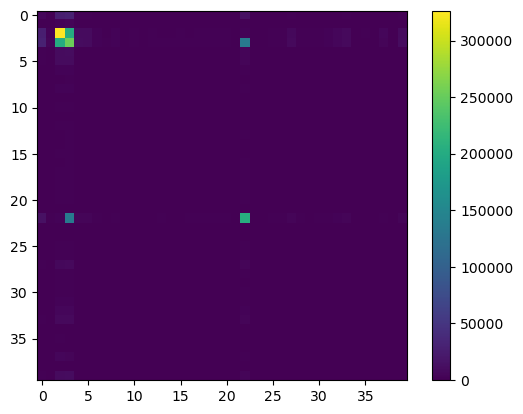

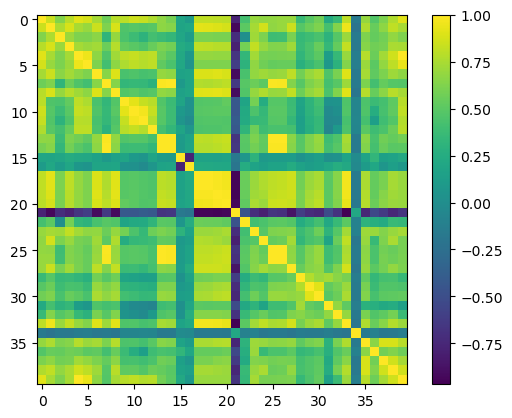

In [14]:
covar = np.cov(X.T)
fig,ax = plt.subplots()
c = ax.imshow(covar)
fig.colorbar(c);
covar = np.cov(X_scaled.T)
fig,ax = plt.subplots()
c = ax.imshow(covar)
fig.colorbar(c);
corr =  np.cov(X_scaled.T)

Trying to find the physical/original features that contribute the most to the PCA model.

In [16]:
from scipy.linalg import eigvals, eig

eigvals, eigvecs = eig(corr)  #look above in this notebook to remind yourself that corr = np.corrcoef(X.T)
                              #and that np.corrcoef(X.T) = np.cov(X_scaled.T)

print(eigvals)
print()
print(np.dot(eigvecs[:,2], eigvecs[:,0]))  #try this for any two independent eigenvectors

PCvals, PCvecs = eigvals, eigvecs
total_variance = np.sum(np.real(PCvals))
explained_variance = np.real(PCvals)/total_variance  #fraction of the total variance represented by each eigenvalue

print(total_variance)
print()
print(explained_variance)

[2.34075173e+01+0.j 4.18508493e+00+0.j 2.33212145e+00+0.j
 1.76281014e+00+0.j 1.36348855e+00+0.j 1.20659122e+00+0.j
 1.01844699e+00+0.j 9.05773125e-01+0.j 7.82642899e-01+0.j
 6.10522440e-01+0.j 3.47564484e-01+0.j 2.80482697e-01+0.j
 2.36872056e-01+0.j 2.16565608e-01+0.j 1.89986605e-01+0.j
 1.60777314e-01+0.j 1.48898632e-01+0.j 1.13331851e-01+0.j
 1.05675009e-01+0.j 9.52746456e-02+0.j 9.08870167e-02+0.j
 7.52413608e-02+0.j 6.42069510e-02+0.j 6.07116107e-02+0.j
 5.12652345e-02+0.j 3.50499534e-02+0.j 3.13508164e-02+0.j
 2.77648890e-02+0.j 2.56517117e-02+0.j 2.11420160e-02+0.j
 1.51044271e-02+0.j 1.25085971e-02+0.j 1.01504897e-02+0.j
 4.49405414e-03+0.j 3.70255669e-03+0.j 2.62797081e-03+0.j
 1.40678850e-03+0.j 9.43011259e-05+0.j 4.93000171e-05+0.j
 4.69626164e-05+0.j]

-4.5102810375396984e-17
40.00388500388503

[5.85131103e-01 1.04616962e-01 5.82973742e-02 4.40659737e-02
 3.40839033e-02 3.01618510e-02 2.54587022e-02 2.26421290e-02
 1.95641723e-02 1.52615787e-02 8.68826826e-03 7.01138646e-0

(10297, 40)


2.332121452216676

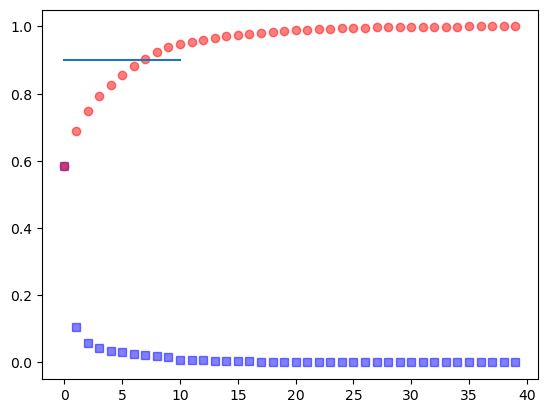

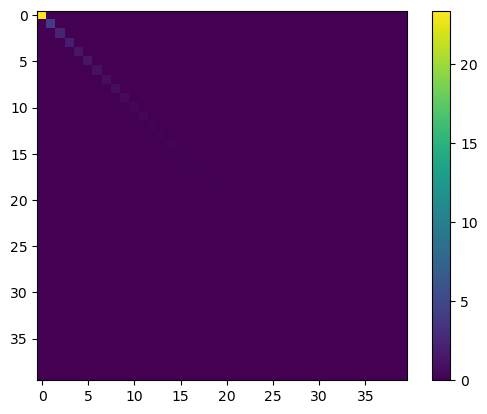

In [10]:
fig, ax = plt.subplots()
ax.plot(explained_variance, 'sb', alpha=0.5)            #blue is the amount of variance explained at each eigenvalue
ax.plot(np.cumsum(explained_variance),'or', alpha=0.5)  #red is the cummulative sum of explained variance
ax.plot([0,10],[0.9, 0.9]);
eigvecs.shape

PC_projection = X_scaled@PCvecs 

print(PC_projection.shape)

corr_PCs = np.cov(PC_projection.T) #covariance matrix of the data projected in the PC directions
fig,ax = plt.subplots()
c = ax.imshow(corr_PCs)
fig.colorbar(c);
PC_projection.shape

corr_PCs[2,2]

In [23]:
k = 40 # number of principal components
sorted_index = np.argsort(PCvals)[::-1]
sorted_eigenvalues = PCvals[sorted_index]
sorted_eigenvectors = PCvecs[:, sorted_index]
top_k_eigenvectors = sorted_eigenvectors[:, :k]
projection_matrix = np.hstack(top_k_eigenvectors)
pc = 0 
feature_index = np.argsort(np.abs(top_k_eigenvectors[:, pc]))[::-1]
top_5_features = feature_index[:5]
bottom_5_features = feature_index[-5:]
print(top_5_features)
print(bottom_5_features)

[19 20 18 33 17]
[22 31 34 16 15]


We can see that the 17th, 18th, 19th, 20th, and 33rd features contribute the most (absolute value) to the overall PCA. And the the 22nd, 31st, 34th, 16th, and 15th features contribute the least (absolute value) to the overall PCA!

## 2. (10 points) Assessing model accuracy

This next part of the homework will explore basic concepts in classification, including generalized linear models and support vector machines. In this homework you will work with the perovskite prediction dataset:

Use the "tau" column of the perovskite dataset (`X_perov[:, -1]`) to train a logistic regression (soft max) classification model. Plot the confusion matrix for the model, and report the accuracy, precision and recall. Consider a "positive" outcome to be defined by 1 (`y_perov=1`) and a negative outcome to be defined by -1 (`y_perov=-1`).

In [57]:
df = pd.read_csv('perovskite_data.csv')
X_perov = df[['nA', 'nB', 'nX', 'rA (Ang)', 'rB (Ang)', 'rX (Ang)', 't', 'tau']].values
y_perov = df['exp_label'].values


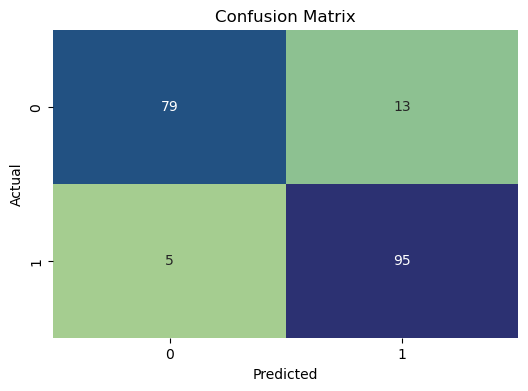

Accuracy: 0.91
Precision: 0.88
Recall: 0.95


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns # I learned this one from DataCamp!

X = df["tau"].values.reshape(-1, 1) #Tau!
y = df['exp_label'].values
y = 2*y - 1 # Conversion!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333)

# This is the one that is built into sklearn, and it is generally the same as the one that we made in class!
# If you look at the code!
model = LogisticRegression(multi_class="multinomial", solver="lbfgs")
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(6,4))
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(cm_df, annot=True, cmap="crest", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
#https://matplotlib.org/stable/tutorials/introductory/pyplot.html
plt.show()

# https://scikit-learn.org/stable/modules/model_evaluation.html Because somethings being depredated soon?
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}") # F{Strings}
print(f"Recall: {recall:.2f}")

## 3. (10 points) Custom non-linear classification boundaries

Consider the perovskite classification as a function of just 2 features, $r_A$ (`X_perov[:,3]`) and $r_B$ (`X_perov[:,4]`). First, build a "baseline model" based on logistic regression and report the accuracy and precision of the baseline model.

Next, use a plot of the data (`y_perov` as a function of `X_perov[:,3]` and `X_perov[:,4]`) to determine a single "custom" feature that improves the separation performance as much as possible. The feature should be based only on $r_A$ and $r_B$. Plot the data as a function of this new feature, and report the accuracy and precision of a logistic regression model (train only) that includes $r_A$, $r_B$, and your feature. Briefly explain how you decided on the feature.

0.6649305555555556
0.625


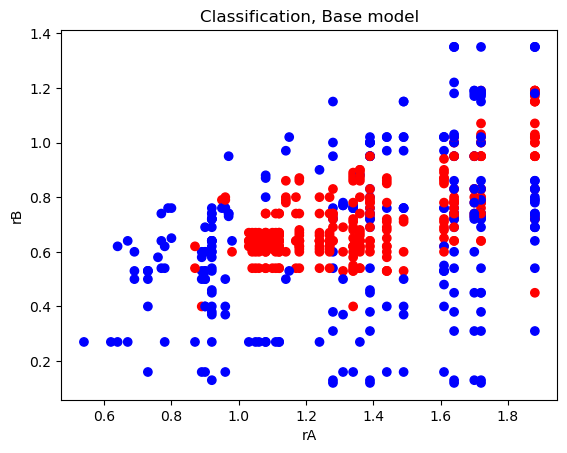

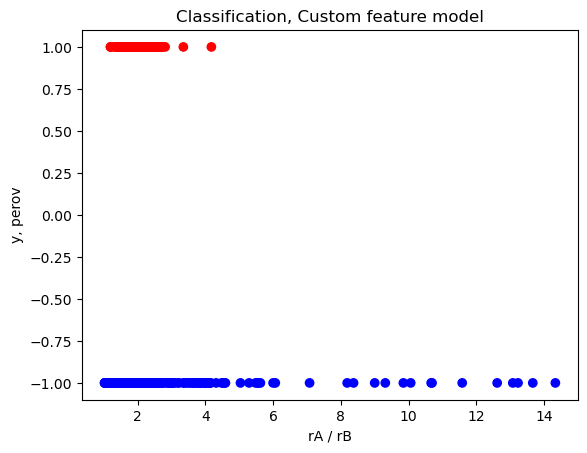

0.6701388888888888
0.6242424242424243


In [67]:
# Baseline Model!
X = X_perov[:, [3, 4]]
model = LogisticRegression()
model.fit(X, y_perov)
y_pred = model.predict(X)

print(accuracy_score(y_perov, y_pred))
print(precision_score(y_perov, y_pred))

# Next, use a plot of the data (`y_perov` as a function of `X_perov[:,3]` and `X_perov[:,4]`) 
# to determine a single "custom" feature that improves the separation performance as much as possible. 
# The feature should be based only on $r_A$ and $r_B$. 
plt.scatter(X[:, 0], X[:, 1], c=y_perov, cmap="bwr")
plt.xlabel("rA")
plt.ylabel("rB")
plt.title("Classification, Base model")
plt.show()

# Based on the accuracy of using the ratio of rA over rB compared with other methods:
# Like rA or rB alone, or using both in multiplication and subtraction, the division 
# method appears to have the highest accuracy.

X_custom = X[:, 0] / X[:, 1]

plt.scatter(X_custom, y_perov, c=y_perov, cmap="bwr")
plt.xlabel("rA / rB")
plt.ylabel("y, perov")
plt.title("Classification, Custom feature model")
plt.show()

X_new = np.c_[X, X_custom]
model_new = LogisticRegression()
model_new.fit(X_new, y_perov)
y_pred_new = model_new.predict(X_new)

print(accuracy_score(y_perov, y_pred_new))
print(precision_score(y_perov, y_pred_new))

Baseline model accuracy: 0.6649
Baseline model precision: 0.625

Custom model accuracy: 0.6701
Custom model precision: 0.624

It yields a marginal increase in accuracy, but not in precision! The other methods I tried around rA and rB lead to a marginal decrease in accuracy! Therefore, I think the best method is to rA/rB, but I think that adding more features would be preferable to this approach. 

## 4. (10 points) Feature Performance
Use all features, including your custom one from (2), one at a time to train logistic regression models on the perovskite data.  Report which feature gives the highest accuracy.  Compare your model results to the decision tree model we trained in class.


In [74]:
X_perov = np.c_[X_perov, X_custom]
acc_scores = []

# Loop over each feature in the dataset
# I swear, I read somewhere that there was a better way to do this!
for i in range(X_perov.shape[1]):
  X = X_perov[:, i].reshape(-1, 1)
  model = LogisticRegression()
  model.fit(X, y_perov)
  y_pred = model.predict(X)
  acc = accuracy_score(y_perov, y_pred)
  acc_scores.append(acc)

best_index = np.argmax(acc_scores)
print(f"The best feature is feature {best_index} with an accuracy of {acc_scores[best_index]:.2f}")


The best feature is feature 7 with an accuracy of 0.89


array([[157,  16],
       [  9, 203]], dtype=int64)

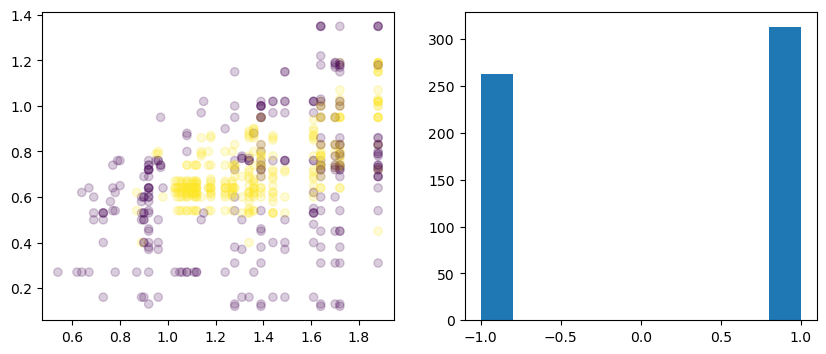

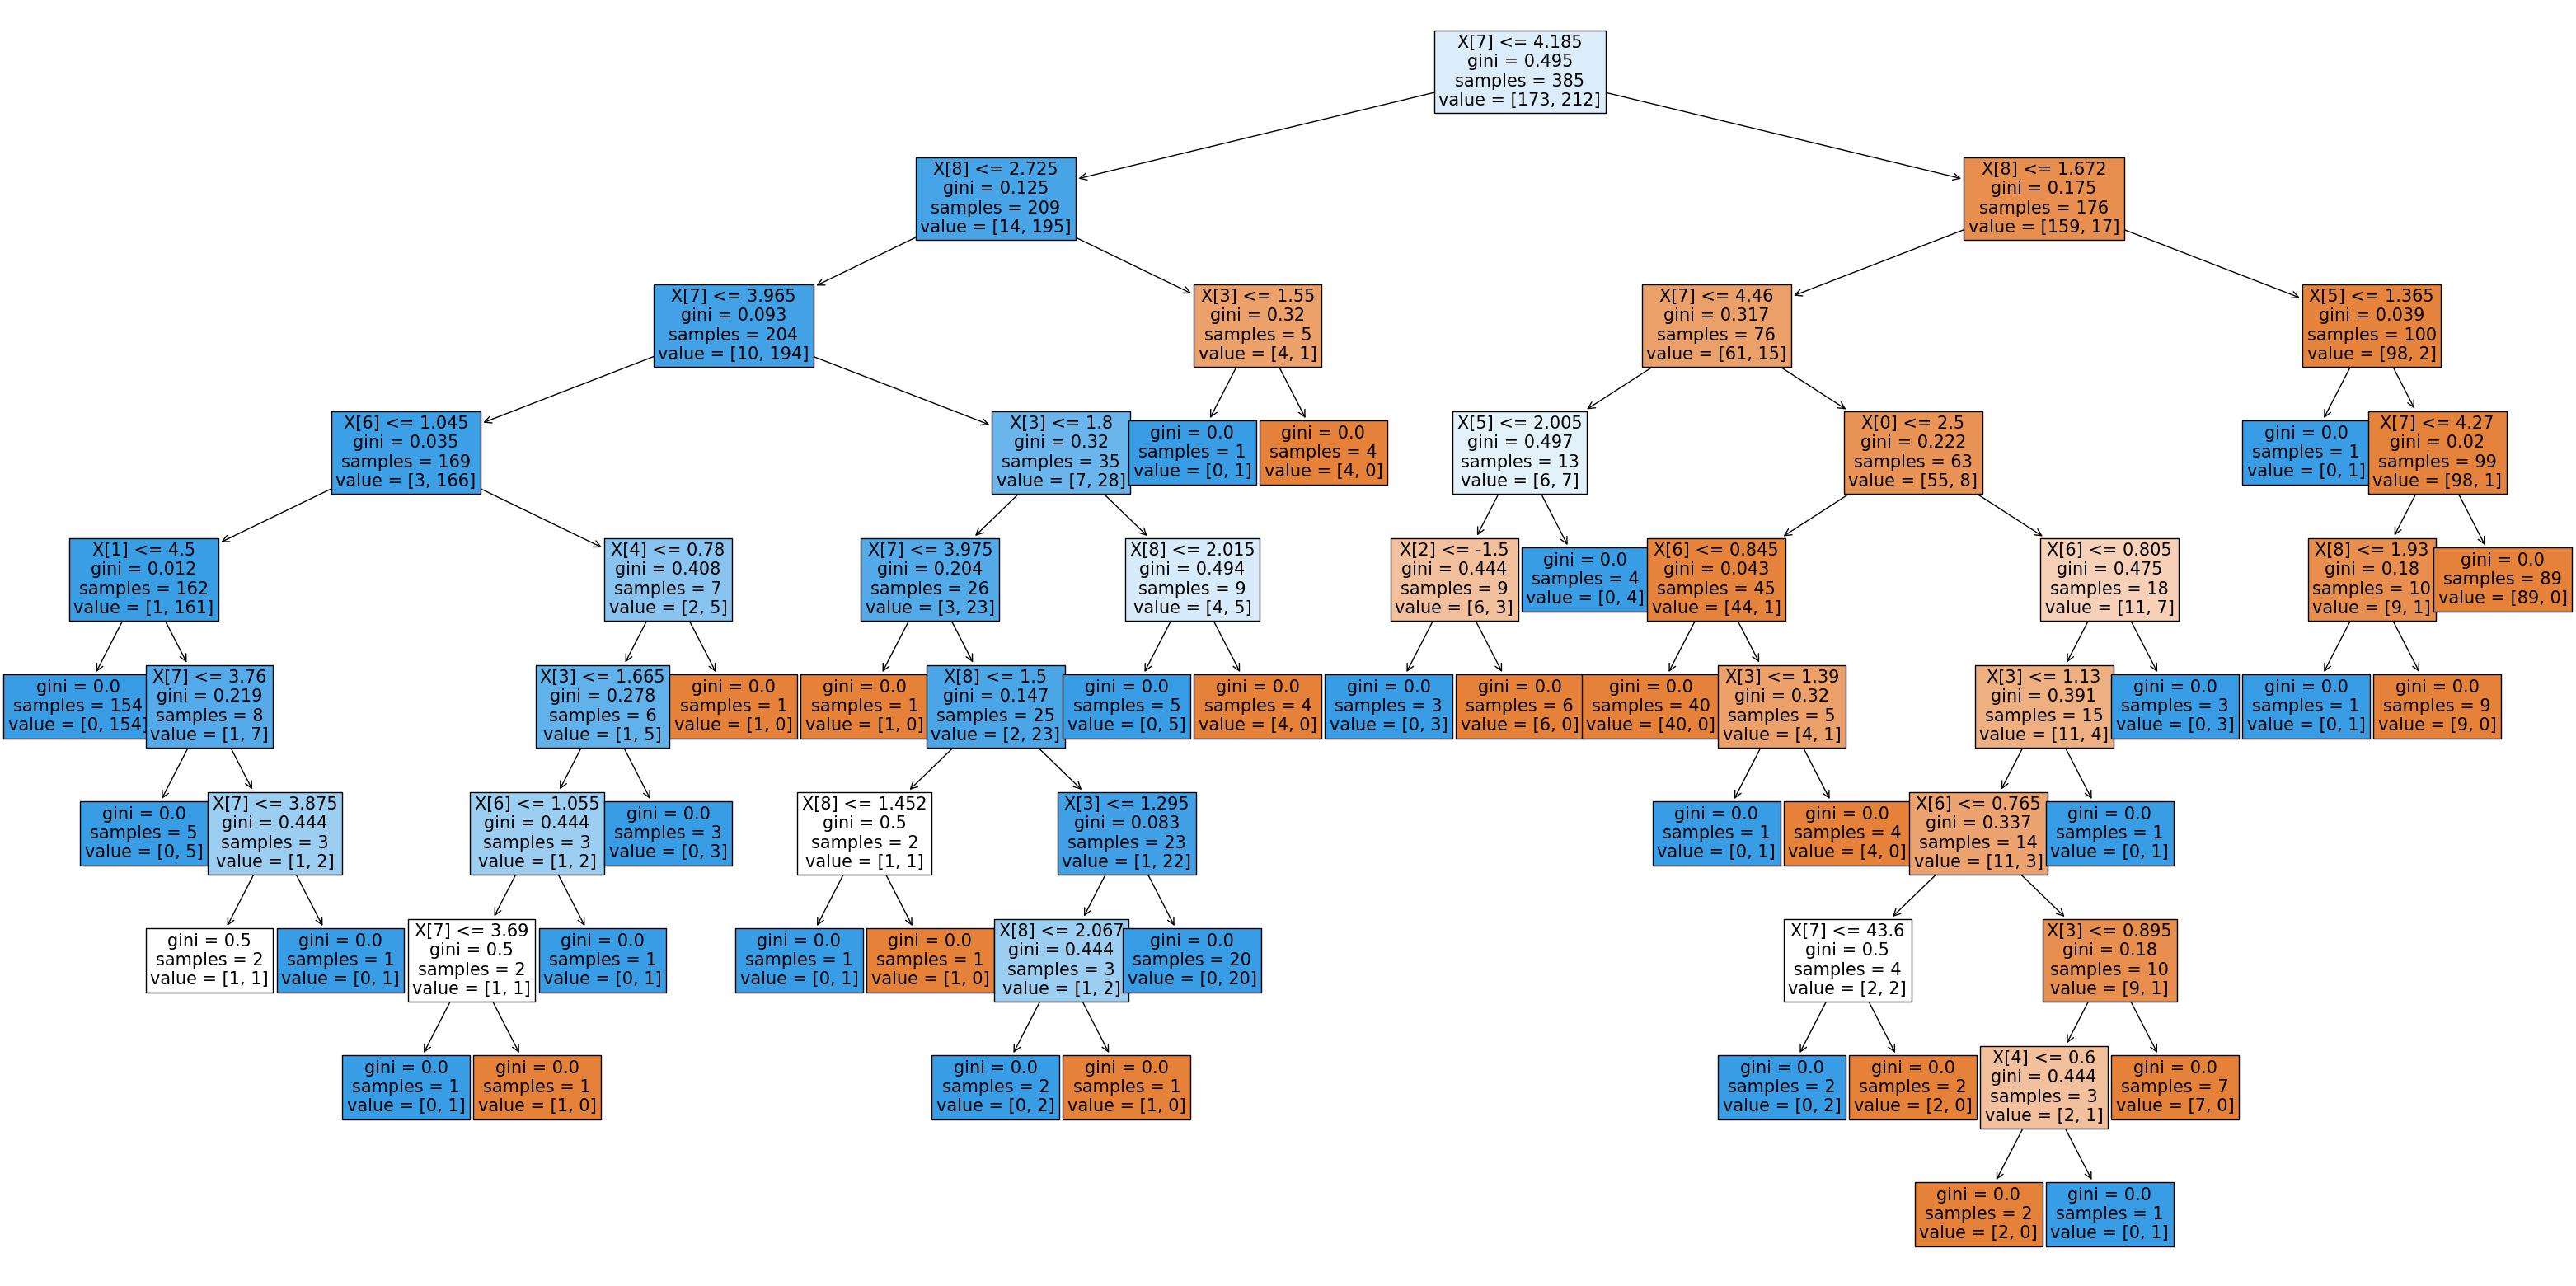

In [71]:
# In-Class Check:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].scatter(X_perov[:,3], X_perov[:,4], c=y_perov, alpha=0.2)
axes[1].hist(y_perov)
X_train, X_test, y_train, y_test = train_test_split(X_perov, y_perov, test_size=0.33)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_predict = dtree.predict(X_train)

cm = confusion_matrix(y_train, y_predict)
cm
from sklearn import tree
plt.figure(figsize=(40,20))
tree.plot_tree(dtree, filled=True, fontsize=15);

dtree=DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train,y_train)
y_predict = dtree.predict(X_train)

cm = confusion_matrix(y_train, y_predict)
cm

Both methods conclude that feature 7 is the best feature for prediction of the label, as it is at the top of the tree for the in class analysis, for our analysis, it is the top with a specific accuracy value (89 percent)!

## 5. (15 points) Weighted neighbors classification

Instead of selecting the k-nearest neighbors to vote, we could design an algorithm where all neighbors get to vote, but their vote is weighted inversely to their distance from the point of interest:

$y_i = \sum_j y_j/(||x_i - x_j||)$

where $j$ is an index over all training points.

Implement this algorithm and test it on the perovskite dataset using a random selection of 75% of the data as training data. Report it's accuracy and precision compared to a 5-nearest neighbors algorithm.

In [96]:
from scipy.spatial import distance as skdistance # I tested both skdistance and distance to see what happens!
from sklearn.metrics import mean_squared_error # I have tried so many things, this seems to work!
# MSE -> MSE = { E[X] - Z }2 + E{ [ X - E[X]]2 } or the bias squared plus the variance of the data (estimate, prediction)
def lecturedistance(x1, x2):
    # we will use the numpy 2-norm to calculate Euclidean distance:
    return np.linalg.norm(x1-x2, 2) #<- the 2 is optional here since 2 is the default.

def lectureassign_class(x, x_list, y_list, k): #<- now we need to know the responses
    neighbors = get_neighbor_idxs(x, x_list, k)
    y_list = list(y_list) #<- this ensures that indexing works properly if y_list is a `pandas` object.
    votes = [y_list[i] for i in neighbors]
    assignment = mode(votes)[0][0] #<- we won't deal with ties for this simple implementation; mode returns most common value
    return assignment

def lecturekNNb(X, k, X_train, y_train): 
    y_out = []
    for xi in X:
        y_out.append(assign_class(xi, X_train, y_train, k))
    y_out = np.array(y_out)
    return y_out

def k_nearest_neighbors(X_train, y_train, X_test, k):
    # Basically, a implementation made to be similar to the lecture model for Knn, but simpler to use!
    y_pred = np.zeros(len(X_test))
    for i, x in enumerate(X_test):
        distances = skdistance.cdist(X_train, [x])
        neighbors = np.argsort(distances, axis=0)[:k]
        labels = y_train[neighbors]
        prediction = np.mean(labels)
        y_pred[i] = prediction
    return y_pred

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

def weighted_distance_voting(X_train, y_train, X_test):
    y_pred = np.zeros(len(X_test))
    for i, x in enumerate(X_test): 
         distances = skdistance.cdist(X_train, [x])
         weights = 1 / distances
         weighted_sum = np.sum(weights * y_train)
         prediction = weighted_sum / np.sum(weights)
         y_pred[i] = prediction
    return y_pred

y_pred_wdv = weighted_distance_voting(X_train, y_train, X_test)
y_pred_knn = k_nearest_neighbors(X_train, y_train, X_test, k=5)

mse_wdv = mean_squared_error(y_test, y_pred_wdv)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print("MSE of weighted distance voting algorithm:", mse_wdv)
print("MSE of k-nearest neighbors algorithm with k=5:", mse_knn)

apr_wdv = acc_prec_recall(y_test, y_pred_wdv) # Doesn't work???
apr_knn = acc_prec_recall(y_test, y_pred_knn) # Doesn't work???

MSE of weighted distance voting algorithm: 0.8484832861151591
MSE of k-nearest neighbors algorithm with k=5: 0.1835507119505807
APR of weighted distance voting algorithm (0.0, 0, 0)
APR of KNN (0.0, 0, 0)


In [94]:
def acc_prec_recall(y_model, y_actual):
    TP = np.sum(np.logical_and(y_model == y_actual, y_model == 1))
    TN = np.sum(np.logical_and(y_model == y_actual, y_model == 0))
    FP = np.sum(np.logical_and(y_model != y_actual, y_model == 1))
    FN = np.sum(np.logical_and(y_model != y_actual, y_model == 0))
    acc = (TP + TN) / (TP + TN + FP + FN)
    if TP == 0:
        prec = 0
        recall = 0
    else:
        prec = TP / (TP + FP)
        recall = TP / (TP + FN)
    return acc, prec, recall

When we used MSE to calculate the total error, as acc_prec_recall is kind of broken for this mutivariate model (KNN), we can see that KNN is has a lower error rate, than the weighted distance voting algorithm, so we can assume that misrecall and misprecision for KNN is lower than the weighted distance voting algorithm!

## 6. (15 points) Comparison of classification model types

Select at least 3 different classification models. These could be models discussed in the lectures, or others that you have learned about elsewhere. Compare the accuracy of these different models for the perovskite dataset.

First select a validation set using holdout (`train_test_split`) with 20% for testing, and optimize at least one hyperparameter for each model using `GridSearchCV` on the training set, and finally evaluate the accuracy by predicting the results of the validation set. Briefly describe your conclusions based on the results.

In [107]:
df = pd.read_csv('perovskite_data.csv')
X_perov = df[['nA', 'nB', 'nX', 'rA (Ang)', 'rB (Ang)', 'rX (Ang)', 't', 'tau']].values
y_perov = df['exp_label'].values

from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_perov, y_perov, test_size=0.2, random_state=42)

# Select three different classification models
# For example: logistic regression, decision tree and random forest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "logistic_regression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.1, 1, 10],
            "solver": ["liblinear", "lbfgs", "saga"]
        }
    },
    "decision_tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [3, 5, 7],
            "min_samples_split": [2, 4, 6]
        }
    },
    "random_forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [10, 50, 100],
            "max_features": ["auto", "sqrt", "log2"]
        }
    }
}

results = {}

# Loop through each model and perform grid search with cross-validation
for model_name, model_info in models.items():
    # Create a grid search object with the model and the parameters
    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=5)
    
    # Fit the grid search on the training data
    grid_search.fit(X_train, y_train)
    
    # Predict the labels of the testing data
    y_pred = grid_search.predict(X_test)
    
    # Compute the accuracy score of the predictions
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the results in the dictionary
    results[model_name] = {
        "best_params": grid_search.best_params_,
        "accuracy": accuracy
    }

# Print the results for each model
for model_name, model_result in results.items():
    print(f"{model_name}:")
    print(f"Best parameters: {model_result['best_params']}")
    print(f"Accuracy: {model_result['accuracy']:.4f}")
    print()

c:\Users\Gabriel Lawrence\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Gabriel Lawrence\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Gabriel Lawrence\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Gabriel Lawrence\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Gabriel Lawrence\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Gabriel Lawrence\anaconda3\lib\site-packages\s

logistic_regression:
Best parameters: {'C': 1, 'solver': 'lbfgs'}
Accuracy: 0.9138

decision_tree:
Best parameters: {'max_depth': 5, 'min_samples_split': 4}
Accuracy: 0.9052

random_forest:
Best parameters: {'max_features': 'sqrt', 'n_estimators': 100}
Accuracy: 0.9138



    From the results of this comparison between logistic regression, decision trees and a random forest model, we can conclude that the logistic regression and random forest models are equally as accurate as each other; however, each model tested provided a different best hyperparameter, which shows the complexity or heterogeneity of the dataset, which is to be expected for a real data set such as this one! Additionally, all the models tested seem to be acceptable without severe overfitting or underfitting as they were all in the 90 percent accuracy range, showing that for this dataset, any of time will work quite well!

## 7. (Graduate Only) (10 points) Logistic regression from the regression perspective

An alternate interpretation of classification is that we are performing non-linear regression to fit a "step function" to our data. Since step functions are not differentiable (or, more accurately, since the derivative of a step function is 0 everywhere except the step), a smooth approximation with non-zero derivatives must be used. One such approximation is the "tanh" function:

$\tanh{(x)} = \frac{2}{1 + \exp{(-x)}} - 1$

This leads to a reformulation of the classification problem as:

$\vec{y} = \tanh{(\bar{\bar{X}}\vec{w})}$

Show that this is mathematically equivalent to "logistic regression", or minimization of the "softmax" cost function.

*Hint:* You may want to review Ch. 4 of "Machine Learning Refined".

Rough Solution? Well, I tried.

Definition of Logistic regression and the soft-max cost function:

$\hat{y} = \sigma(\bar{\bar{x}}^T\vec{w})$

where $\sigma(\cdot)$ [sigmoid function]:

$\sigma(x) = \frac{1}{1 + \exp{(-x)}}$

The softmax cost function is a measure of how well the logistic regression model fits the data, which is defined as this disgusting thing: 

$g(\vec{w}) = \frac{1}{P}\sum_{p=1}^P g_p(\vec{w})$

where $g_p(\vec{w})$ is the pointwise cost for the $p$-th instance given by:

$g_p(\vec{w}) = -\log(\sigma(\bar{\bar{x}}_p^T\vec{w})) \& \text{if } y_p = +1 \ -\log(1 - \sigma(\bar{\bar{x}}_p^T\vec{w})) \text{ if } y_p = -1 $

Tanh Function: (Because this is at least differentiable, unlike the step function...)

$\tanh(x) = \frac{2}{1 + \exp{(-x)}} - 1$

Rewritten logistic regression model:

$\hat{y} = \frac{\tanh(\bar{\bar{x}}^T\vec{w}) + 1}{2}$

Supported by this identity: 

$\sigma(x) = \frac{\tanh(x/2) + 1}{2}$

$\sigma(x) = \frac{1}{1 + \exp{(-x)}} = \frac{\exp{(x/2)}}{\exp{(x/2)} + \exp{(-x/2)}} = \frac{\exp{(x/2)} - \exp{(-x/2)} + 2\exp{(-x/2)}}{\exp{(x/2)} + \exp{(-x/2)}} = \frac{\sinh(x/2) + 2\cosh(x/2)}{\cosh(x/2) + \sinh(x/2)} = \frac{\sinh(x/2) + 2}{\cosh(x/2) + 1} = \frac{\tanh(x/2) + 1}{2}$

Using this identity, we can also rewrite our softmax cost function as:

$g(\vec{w}) = -\frac{1}{P}\sum_{p=1}^P y_p\tanh(\bar{\bar{x}}_p^T\vec{w}) + C$

Therefore:

$g(\vec{w}) = -\frac{1}{P}\sum_{p=1}^P y_p\log(\sigma(\bar{\bar{x}}_p^T\vec{w})) + (1 - y_p)\log(1 - \sigma(\bar{\bar{x}}_p^T\vec{w})) = -\frac{1}{P}$